## 1. Best First Search

**Basic Navigator for Chinese Cities**<br>
根据中国的城市，做一个简易版的导航地图

In [1]:
coordinations_chinese = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

### 1.1 Extract City With Location 

In [2]:
import re

In [3]:
from collections import defaultdict

In [4]:
city_location = defaultdict(tuple)

In [5]:
for line in coordinations_chinese.split('\n'):
    # Skip city Haikou, Taiwan, Tibet
    if line.startswith('//'): continue
        
    # Skip the first and last empty lines
    if line.strip() == '': continue
    
    # Get city name
    city = re.findall("name:'(\w+)'", line)[0]
    
    # Get city location
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    x_y = tuple(map(float, x_y))
    
    # Save to dictionary
    city_location[city] = x_y

In [6]:
# View the city with location
for c, l in city_location.items():
    print(c, l)

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


### 1.2 Compute Geo_Distance Between Two Cities

In [7]:
import math

In [8]:
# Refer to the function to compute geo_distance
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [9]:
# Build function to get two cities geo_distance
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [10]:
# Test
city1 = '武汉'
city2 = '广州'
distance = get_city_distance(city1, city2)
print('Geo_Distance from {} to {} is {:.2f} km'.format(city1, city2, distance))

Geo_Distance from 武汉 to 广州 is 350.79 km


### 1.3 Visulization Map

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']

In [12]:
# Init graph object
city_graph = nx.Graph()

In [13]:
# add nodes to graph
city_graph.add_nodes_from(list(city_location.keys()))

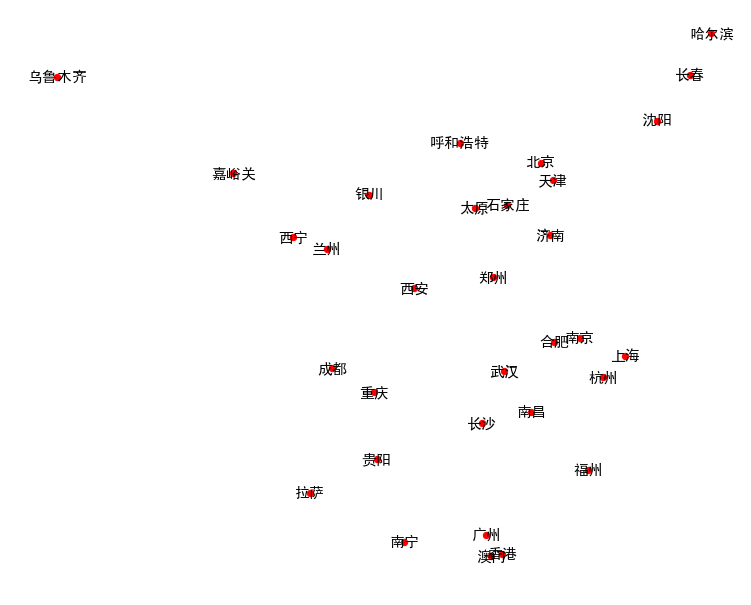

In [14]:
# Draw graph
plt.figure(figsize=(10,8))
nx.draw(city_graph, pos=city_location, with_labels=True, node_size=40, font_size=15)
plt.show()

In [15]:
# Set distance threshold
threshold = 700

In [16]:
from collections import defaultdict

In [17]:
city_connections = defaultdict(list)

In [18]:
# Get city list
cities = list(city_location.keys())

In [19]:
# Build connections by distance threshold
for c1 in cities:
    for c2 in cities:
        if c1 == c2: continue
        
        if get_city_distance(c1, c2) < threshold:
            city_connections[c1].append(c2)

In [20]:
# Init connection graph
city_connections_graph = nx.Graph(city_connections)

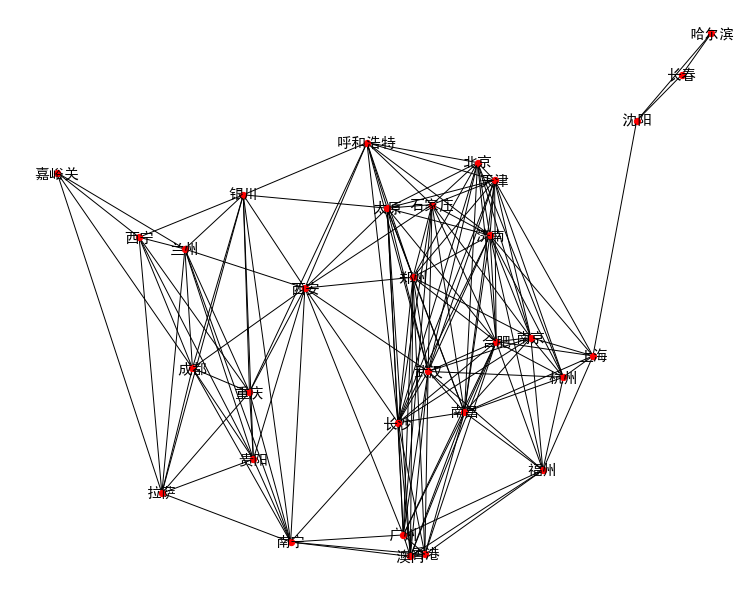

In [21]:
# Draw graph
plt.figure(figsize=(10,8))
nx.draw(city_connections_graph, city_location, with_labels=True, node_size=40, font_size=15)
plt.show()

In [22]:
get_city_distance('沈阳', '北京')

776.4154006857316

In [23]:
get_city_distance('沈阳', '上海')

664.4873799505449

### 1.4 Init Search Function

In [24]:
def is_goal(current_path, destination):
    return current_path[-1] == destination

In [25]:
# Test
is_goal(['西安', '兰州'], '兰州')

True

In [26]:
def is_goal(destination):
    def _wrap(current_path):
        return current_path[-1] == destination
    return _wrap

In [27]:
# Test
is_goal('上海')

<function __main__.is_goal.<locals>._wrap(current_path)>

In [28]:
# Init function to search path
def search(graph, start, is_goal):
    pathes = [[start]]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier_city = path[-1]
        
        if frontier_city in seen: continue
        
        successor_cities = graph[frontier_city]
        
        for city in successor_cities:
            if city in path: continue
            
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if is_goal(new_path): return new_path
        
        seen.add(frontier_city)

In [29]:
# Test
search(city_connections, '北京', is_goal('拉萨'))

['北京', '长沙', '南宁', '拉萨']

### 1.5 Add Search Strategy

In [30]:
# Optimaize search function
def search(graph, start, is_goal, search_strategy):
    pathes = [[start]]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier_city = path[-1]
        
        if frontier_city in seen: continue
        
        successor_cities = graph[frontier_city]
        
        for city in successor_cities:
            if city in path: continue
            
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if is_goal(new_path): return new_path
            
        # print('before sort:',pathes)
        seen.add(frontier_city)
        pathes = search_strategy(pathes)
        # print('after sort:',pathes)
        # print('')

In [31]:
def sort_path(cmp_func):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)
    return _sorted

**1.5.1 Search Without Strategy**

In [32]:
# Search when strategy is empty
search(city_connections, '北京', is_goal('拉萨'), search_strategy=lambda n: n)

['北京', '长沙', '南宁', '拉萨']

**1.5.2 Search With Shortest Distance**

In [33]:
# Build function to compute path distance
def get_path_distance(path):
    distance = 0
    
    for index, city in enumerate(path[:-1]):
        distance += get_city_distance(city, path[index+1])
    
    return distance

In [34]:
# Search when strategy is shortest distance
search(city_connections, '北京', is_goal('拉萨'), sort_path(get_path_distance))

['北京', '呼和浩特', '银川', '拉萨']

In [35]:
# Test 1
path = ['北京', '呼和浩特', '银川', '拉萨']
distance = get_path_distance(path)
print('Distance from {} to {} with path {} is {:.2f} km'.format(path[0], path[-1], path, distance))

Distance from 北京 to 拉萨 with path ['北京', '呼和浩特', '银川', '拉萨'] is 1680.97 km


In [36]:
# Test 2
path = ['北京', '长沙', '南宁', '拉萨']
distance = get_path_distance(path)
print('Distance from {} to {} with path {} is {:.2f} km'.format(path[0], path[-1], path, distance))

Distance from 北京 to 拉萨 with path ['北京', '长沙', '南宁', '拉萨'] is 1851.14 km


**1.5.3 Search With Least Stations**

In [37]:
# Build function to get path length
def get_total_station(path):
    return len(path)

In [38]:
# Search when strategy is least stations
search(city_connections, '北京', is_goal('拉萨'), sort_path(get_total_station))

['北京', '长沙', '南宁', '拉萨']

**1.5.4 Search With Shortest Distance & Least Stations**

In [39]:
def get_comprehensive_path(path):
    return get_path_distance(path) + get_total_station(path)

In [40]:
# Search when strategy is (shortest distance & least stations)
search(city_connections, '北京', is_goal('拉萨'), sort_path(get_comprehensive_path))

['北京', '呼和浩特', '银川', '拉萨']

**1.5.5 Search With Maximum Stations**

In [41]:
def get_as_much_station(path): 
    return -1 * len(path)

In [46]:
# Search when strategy is maximum stations
path = search(city_connections, '北京', is_goal('拉萨'), sort_path(get_as_much_station))
print(path)

['北京', '石家庄', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '太原', '西安', '兰州', '拉萨']


----

## 2. Titanic Machine Learning

>titanic data download path: https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
titanic_path = './data/titanic/train.csv'
df = pd.read_csv(titanic_path)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check empty values
for col in df.columns:
    empty_count = df[col].isnull().sum()
    if empty_count:
        print("'{}' empty record is: {}".format(col, empty_count))

'Age' empty record is: 177
'Cabin' empty record is: 687
'Embarked' empty record is: 2


In [5]:
# Drop empty values
clean_df = df.drop(['Cabin'], axis=1)
clean_df = clean_df.dropna()
print('Number of original samples is {}'.format(df.shape[0]))
print('Number after dropping empty is: {}'.format(clean_df.shape[0]))   

Number of original samples is 891
Number after dropping empty is: 712


In [24]:
fares = clean_df['Fare'].tolist()
ages = clean_df['Age'].tolist()

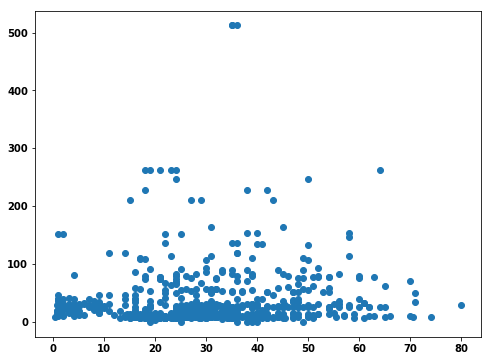

In [32]:
plt.figure(figsize = (8, 6))
plt.scatter(ages, fares)
plt.show()

In [7]:
clean_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [52]:
age_with_fares = clean_df[
    (clean_df['Age'] > 22) & (clean_df['Fare'] < 400) & (clean_df['Fare'] > 130)]
age_with_fares.shape

(22, 11)

In [53]:
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']

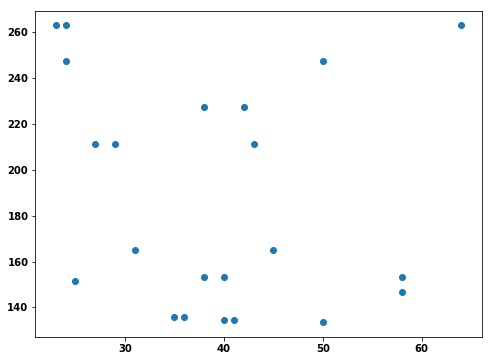

In [54]:
plt.figure(figsize = (8, 6))
plt.scatter(sub_age, sub_fare)
plt.show()

In [55]:
def func(age, k, b): return k * age + b

In [56]:
def loss(y, yhat):
    """
    :param y: the real fares
    :param yhat: the estimated fares
    :return: how good is the estimated fares
    """

    return np.mean(np.abs(y - yhat))
    # return np.mean(np.square(y - yhat))
    # return np.mean(np.sqrt(y - yhat))

In [57]:
min_error_rate = float('inf')

In [58]:
loop_times = 100

In [59]:
losses = []

In [60]:
change_directions = [
    # (k, b)
    (+1, -1), # k increase, b decrease
    (+1, +1),
    (-1, +1),
    (-1, -1)  # k decrease, b decrease
]

In [61]:
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10

In [62]:
best_k, best_b = k_hat, b_hat

best_direction = None

In [63]:
def step(): return random.random() * 1

In [64]:
direction = random.choice(change_directions)

In [65]:
def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]

    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])

In [66]:
def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])

In [67]:
learing_rate = 1e-1

In [68]:
while loop_times > 0:

    k_delta = -1 * learing_rate * derivate_k(sub_fare, func(sub_age, k_hat, b_hat), sub_age)
    b_delta = -1 * learing_rate * derivate_b(sub_fare, func(sub_age, k_hat, b_hat))

    # k_delta_direction, b_delta_direction = direction
    #
    # k_delta = k_delta_direction * step()
    # b_delta = b_delta_direction * step()
    #
    # new_k = best_k + k_delta
    # new_b = best_b + b_delta

    k_hat += k_delta
    b_hat += b_delta

    estimated_fares = func(sub_age, k_hat, b_hat)
    error_rate = loss(y=sub_fare, yhat=estimated_fares)

    # if error_rate < min_error_rate:
    #     min_error_rate = error_rate
    #     best_k, best_b = new_k, new_b
        # best_k, best_b = k_hat, b_hat

        # direction = (k_delta_direction, b_delta_direction)

        # print(min_error_rate)
    print('loop == {}'.format(loop_times))
        # losses.append(min_error_rate)
    print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))
    # else:
    #     direction = random.choice(list(set(change_directions) - {(k_delta_direction, b_delta_direction)}))

    losses.append(error_rate)

    loop_times -= 1




# plt.plot(range(len(losses)), losses)
# plt.show()

loop == 100
f(age) = -1.1513552272893577 * age + 0.7709358758972567, with error rate: 81.49666385718535
loop == 99
f(age) = -1.1513552272893577 * age + 0.7709358758972567, with error rate: 69.76984820652147
loop == 98
f(age) = -1.1513552272893577 * age + 0.7709358758972567, with error rate: 62.8047534347189
loop == 97
f(age) = -1.1513552272893577 * age + 0.7709358758972567, with error rate: 65.8867397798626
loop == 96
f(age) = -1.1513552272893577 * age + 0.7709358758972567, with error rate: 60.774371775676244
loop == 95
f(age) = -1.1513552272893577 * age + 0.7709358758972567, with error rate: 62.45759290277994
loop == 94
f(age) = -1.1513552272893577 * age + 0.7709358758972567, with error rate: 61.74566252562799
loop == 93
f(age) = -1.1513552272893577 * age + 0.7709358758972567, with error rate: 67.017782090819
loop == 92
f(age) = -1.1513552272893577 * age + 0.7709358758972567, with error rate: 65.78429263201943
loop == 91
f(age) = -1.1513552272893577 * age + 0.7709358758972567, with er

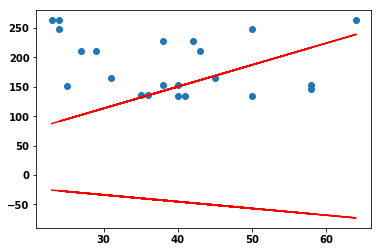

In [69]:
plt.scatter(sub_age, sub_fare)
plt.plot(sub_age, func(sub_age, best_k, best_b), c='r')
plt.plot(sub_age, func(sub_age, k_hat, b_hat), c='r')
plt.show()